In [43]:
%load_ext autoreload
%autoreload 2

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import gdal
import pandas as pd
%matplotlib inline

from modis_funcs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Leaf area index (LAI) from the MODIS sensors

The MODIS sensors have been acquiring data for the past two decades. The MODIS team has produced a large set of useful global land, atmosphere and ocean products, incluiding an LAI and fAPAR product. We have processed data over Ghana since 2002, and will now explore how the data looks like. We will be extracting area averaged estimates (in this case, we'll average over one of Ghana's 216 districts). We will also use a land cover product to select a particular land cover type (e.g. croplands, or forests). Our aim is to visualise and try to understand the dynamics of LAI over time. 

## LAI extraction

We have downloaded and processed the MODIS MCD15A3H product, which provides LAI every 8 days from the combined observations of the TERRA and AQUA satellites. The product has been mosaicked to cover the whole of Ghana, and is available remotely. We have also collated the MODIS MCD12Q1 product so you can select pixels that were given a particular land cover class.

The next cell gives you an easy GUI to extract the data. The data is extracted into a pandas dataframe, so you can easily save it to a CSV file for further playing around with it.


Be aware that running the data extraction GUI takes a bit! There's a lot of data to chomp through!!

In [46]:
w = select_region_modis_lai()
w


interactive(children=(Dropdown(description='district', options=('Jomoro', 'Ellembelle', 'Nzema East', 'Ahanta …

In [47]:
df = w.result
df = df.set_index(pd.DatetimeIndex(df['date']))


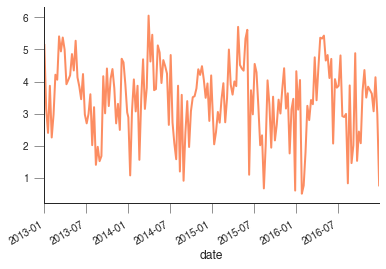

In [48]:
df['mean'].plot()